# Data Perspective: Evolution of Education for Children under 5 in Zimbabwe - Task 2

## Introduction

The early years of a child's life are crucial for cognitive, physical, and socio-emotional development. During the ages of 4 to 5 years, children experience rapid growth in their ability to understand and interact with the world around them. This Data Perspective focuses on analyzing the educational performance of Children under 5 in Zimbabwe, utilizing data from the 2019 Multiple Indicator Cluster Survey (MICS6). 

The goal of this analysis is to provide insights into how educational outcomes evolve month by month for children within this critical age range. The analysis covers general education, literacy and math, physical abilities, learning capacity, and socio-emotional development. By exploring these aspects, we aim to offer a comprehensive understanding of the factors that influence early childhood education and the implications for future educational attainment.

The data, derived from interviews with mothers and caregivers, allow for a detailed examination of various developmental milestones and behaviors. This report not only highlights key findings but also presents them through clean and engaging visuals, ensuring that the results are both accessible and informative for high-level technical management and policymakers.




### Importing Necessary Libraries

To begin the analysis, we first import the essential libraries required for data manipulation and visualization. In this case, we are using `pandas` for data handling, `numpy` for numerical operations, and `matplotlib` for creating visualizations.


In [1]:
#%% Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Function to Report Missing and Unusual Values

To ensure the quality and reliability of our data, it is essential to identify and address missing or unusual values before proceeding with the analysis. The following function, `report_missing_and_unusual`, is designed to perform these checks on specified columns of the dataset.

#### Function Description

The function `report_missing_and_unusual` takes in a dataset and a list of columns to evaluate. It performs the following tasks:

1. **Missing Values**: Counts the number of missing values in each specified column.
2. **Unusual Values**: Detects unusual values based on specific criteria for each column:
    - For the `child_age_years` column, the function checks if the values are within the expected range of 3 to 5 years.
    - For the `interview_date` column, the function verifies that the dates are valid and within the year 2019.
    - For the `child_birthday` column, the function ensures that birth dates are reasonable, expecting years around 2014 to 2016.

The output is a summary report that highlights any missing or unusual values found in the dataset, presented in a DataFrame for clarity.


In [2]:

#%% Function to report missing and unusual values
def report_missing_and_unusual(data, columns):
    report = {}
    for col in columns:
        # Identify missing values
        missing_count = data[col].isna().sum()
        
        # Identify unusual values based on specific checks
        if col == 'child_age_years':
            unusual_values = data[~data[col].isin([3, 4, 5])][col].value_counts()  # Expected ages are 3, 4, 5
        elif col == 'interview_date':
            # Check if dates are valid and within a reasonable range (e.g., within 2019)
            data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime, coerce errors to NaT
            unusual_values = data[pd.isna(data[col]) | (data[col].dt.year != 2019)][col].value_counts()
        elif col == 'child_birthday':
            # Check if birth dates are reasonable, e.g., within a few years of the child's age
            data['child_birthday'] = pd.to_datetime(data['child_birthday'], errors='coerce')  # Convert to datetime
            unusual_values = data[
                                  (data['child_birthday'].dt.year < 2014) | 
                                  (data['child_birthday'].dt.year > 2016)][col].value_counts()  # Expecting birth years around 2014-2016

        # Add to report
        report[col] = {
            'Missing Values': missing_count,
            'Unusual Values': unusual_values.to_dict()
        }
    
    # Convert the report to a DataFrame for better readability
    report_df = pd.DataFrame(report).transpose()
    return report_df


### Loading the Dataset

The analysis begins by loading the dataset that contains information about 4- to 5-year-old children from the 2019 Zimbabwe MICS6 survey. The data is stored in a CSV file, which we read into a Pandas DataFrame for further processing.


In [3]:

#%% Load the dataset
file_path = 'Zimbabwe_children_under5_interview.csv' 
data = pd.read_csv(file_path)


In [4]:
data

,interview_date,child_age_years,child_birthday,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,EC15
0,2019-03-31,3,2016-02-20,2,2,1,1,2,1,1,1,2,2
1,2019-03-14,3,2015-10-19,2,2,2,1,2,2,2,1,1,1
2,2019-03-17,4,2014-10-26,2,2,2,1,1,1,2,1,2,1
3,2019-03-14,3,2015-03-21,1,2,2,1,2,1,1,1,2,1
4,2019-03-14,3,2015-05-18,2,1,1,1,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2019-02-03,4,2014-07-27,2,1,1,2,2,1,1,1,2,2
2513,2019-02-03,3,2015-08-11,2,2,2,1,2,1,1,1,2,1
2514,2019-03-03,3,2015-08-03,2,2,2,1,2,1,1,1,2,2
2515,2019-02-01,4,2014-02-28,2,2,2,1,1,1,1,1,1,1


### Analyzing Missing and Unusual Values

After loading the dataset, the next step is to assess the data quality by analyzing missing and unusual values in key columns. We specifically focus on the `interview_date`, `child_age_years`, and `child_birthday` columns. The results of this analysis help identify any anomalies that may need to be addressed before proceeding with further analysis.

The `report_missing_and_unusual` function was applied to these columns, and the following report was generated:


In [5]:

#%% Analyze missing and unusual values
columns_to_analyze = ['interview_date', 'child_age_years', 'child_birthday']
missing_unusual_report = report_missing_and_unusual(data, columns_to_analyze)
print("Missing and Unusual Values Report:")
print(missing_unusual_report)
#%%
# Exclude the row with the unusual interview date
data_cleaned = data[data['interview_date'] != '2018-12-21']


Missing and Unusual Values Report:
                Missing Values            Unusual Values
interview_date               0  {2018-12-21 00:00:00: 1}
child_age_years              0                        {}
child_birthday              26                        {}


### Data Cleaning

To prepare the data for analysis, we perform several cleaning steps to handle missing or invalid values in key educational indicators. This ensures that the dataset is accurate and complete, providing a solid foundation for the subsequent analysis.

#### Steps in Data Cleaning:

1. **Handling 'Don't Know' and 'Other' Responses:**
   - In the survey data, certain responses are coded as '8' (Don't Know) or '9' (Other). These values are not informative for our analysis, so they are converted to `NaN` (Not a Number) using `pd.NA` to indicate missing values.

2. **Dropping Rows with Missing Values:**
   - After converting '8' and '9' responses to `NaN`, we drop any rows that have missing values in the key educational columns (`EC6` to `EC15`). This step ensures that our analysis is based on complete cases, avoiding biases that may arise from incomplete data.

3. **Verifying the Cleaning Process:**
   - Finally, we check the dataset to ensure that there are no remaining missing values in the educational columns after the cleaning process.


In [6]:

#%% Data Cleaning
# Convert '8' (Don't Know) and '9' (Other) to NaN (pd.NA)
for col in ['EC6', 'EC7', 'EC8', 'EC9', 'EC10', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15']:
    data_cleaned[col] = data_cleaned[col].replace([8, 9], pd.NA)

# Drop rows with missing values in EC columns
data_cleaned = data_cleaned.dropna(subset=['EC6', 'EC7', 'EC8', 'EC9', 'EC10', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15'])

# Verify missing values after cleaning
print("Missing Values Summary After Cleaning:")
print(data_cleaned.isna().sum())


Missing Values Summary After Cleaning:
interview_date      0
child_age_years     0
child_birthday     25
EC6                 0
EC7                 0
EC8                 0
EC9                 0
EC10                0
EC11                0
EC12                0
EC13                0
EC14                0
EC15                0
dtype: int64


C:\Users\mashhadcom.com\AppData\Local\Temp\ipykernel_26492\2785336632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].replace([8, 9], pd.NA)


### Conversion of Interview Dates and Temporal Analysis

To explore the temporal aspects of the data, we first convert the `interview_date` column to a datetime format. This allows us to extract meaningful temporal information, such as the month and year of the interview. Analyzing the distribution of interviews over time can provide insights into any seasonal trends or data collection patterns.

#### Steps:

1. **Convert `interview_date` to Datetime:**
   - The `interview_date` column is converted to a datetime object to facilitate the extraction of specific temporal components, such as month and year.

2. **Extracting Month and Year:**
   - After converting the date, we extract the month and year, combining them into a single period (in months) using `dt.to_period('M')`. This creates a new column, `interview_month`, which represents the month and year of each interview.

3. **Frequency Analysis of Interview Months:**
   - We then generate a frequency report for the `interview_month` to understand how interviews were distributed across different months. This analysis can reveal any clustering or gaps in data collection over time.


In [7]:

#%% Convert interview_date to datetime and extract month/year
data_cleaned['interview_date'] = pd.to_datetime(data_cleaned['interview_date'])
data_cleaned['interview_month'] = data_cleaned['interview_date'].dt.to_period('M')

# Generate frequency report for interview_month
interview_month_frequency = data_cleaned['interview_month'].value_counts().sort_index()
print("Frequency of Interview Month:")
print(interview_month_frequency)



Frequency of Interview Month:
interview_month
2019-01    746
2019-02    778
2019-03    889
2019-04     58
Freq: M, Name: count, dtype: int64


**Interpretation:**

The frequency distribution reveals a significant imbalance in the number of interviews conducted across different months in 2019. The first quarter of the year (January to March) accounts for the majority of the data, while April has a notably lower count of only 58 interviews. This imbalance suggests that the data is not uniformly distributed across the year, which could potentially bias the results if not addressed properly.

**Weighting Strategy:**

To account for this temporal imbalance, we will consider applying a weighting strategy based on the month of the interview. This approach will ensure that each month's data is appropriately represented in the analysis, providing a more balanced and accurate reflection of the educational performance over time.

By implementing this weighting strategy, we aim to mitigate any biases introduced by the uneven distribution of interviews, thereby enhancing the robustness of our findings.


### Transforming Data and Creating Composite Indicators

To facilitate the analysis of educational and developmental outcomes, we performed the following steps:

1. **Transforming Values:**
   - The original survey data uses `1` to represent "Yes" and `2` to represent "No" for various developmental indicators. For simplicity and consistency in calculating averages, we transformed these values so that `1` remains as "Yes" (1) and `2` is converted to "No" (0).

2. **Creating Composite Indicators:**
   - To provide a more holistic view of the children's development, we created composite indicators by averaging related variables:
     - **Literacy and Math:** Average of the ability to identify letters, read simple words, and recognize numbers (`EC6`, `EC7`, `EC8`).
     - **Physical Development:** Average of fine motor skills and general health (`EC9`, `EC10`).
     - **Learning Abilities:** Average of the ability to follow directions and perform tasks independently (`EC11`, `EC12`).
     - **Socio-Emotional Development:** Average of getting along with others, aggressive behavior, and attention span (`EC13`, `EC14`, `EC15`).

These composite indicators allow us to summarize the data into meaningful categories that can be analyzed more effectively.


In [8]:
# Transforming the values: 2 -> 0 (No) and 1 -> 1 (Yes)
columns_to_transform = ['EC6', 'EC7', 'EC8', 'EC9', 'EC10', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15']
data_cleaned[columns_to_transform] = data_cleaned[columns_to_transform].replace({2: 0, 1: 1})

#%% Create composite indicators using the Averaged Index
data_cleaned['Literacy_Math_Avg'] = data_cleaned[['EC6', 'EC7', 'EC8']].mean(axis=1)
data_cleaned['Physical_Development_Avg'] = data_cleaned[['EC9', 'EC10']].mean(axis=1)
data_cleaned['Learning_Abilities_Avg'] = data_cleaned[['EC11', 'EC12']].mean(axis=1)
data_cleaned['Socio_Emotional_Avg'] = data_cleaned[['EC13', 'EC14', 'EC15']].mean(axis=1)

#%% Calculate monthly trends for averaged indices
monthly_trends_avg = data_cleaned.groupby('interview_month').mean()[[
    'Literacy_Math_Avg', 
    'Physical_Development_Avg', 
    'Learning_Abilities_Avg', 
    'Socio_Emotional_Avg'
]]


In [9]:
data_cleaned

,interview_date,child_age_years,child_birthday,EC6,EC7,EC8,EC9,EC10,EC11,EC12,EC13,EC14,EC15,interview_month,Literacy_Math_Avg,Physical_Development_Avg,Learning_Abilities_Avg,Socio_Emotional_Avg
0,2019-03-31,3,2016-02-20,0,0,1,1,0,1,1,1,0,0,2019-03,0.333333,0.5,1.0,0.333333
1,2019-03-14,3,2015-10-19,0,0,0,1,0,0,0,1,1,1,2019-03,0.000000,0.5,0.0,1.000000
2,2019-03-17,4,2014-10-26,0,0,0,1,1,1,0,1,0,1,2019-03,0.000000,1.0,0.5,0.666667
3,2019-03-14,3,2015-03-21,1,0,0,1,0,1,1,1,0,1,2019-03,0.333333,0.5,1.0,0.666667
4,2019-03-14,3,2015-05-18,0,1,1,1,0,1,0,1,0,1,2019-03,0.666667,0.5,0.5,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2019-02-03,4,2014-07-27,0,1,1,0,0,1,1,1,0,0,2019-02,0.666667,0.0,1.0,0.333333
2513,2019-02-03,3,2015-08-11,0,0,0,1,0,1,1,1,0,1,2019-02,0.000000,0.5,1.0,0.666667
2514,2019-03-03,3,2015-08-03,0,0,0,1,0,1,1,1,0,0,2019-03,0.000000,0.5,1.0,0.333333
2515,2019-02-01,4,2014-02-28,0,0,0,1,1,1,1,1,1,1,2019-02,0.000000,1.0,1.0,1.000000


In [10]:
monthly_trends_avg.reset_index()

,interview_month,Literacy_Math_Avg,Physical_Development_Avg,Learning_Abilities_Avg,Socio_Emotional_Avg
0,2019-01,0.132261,0.660188,0.794906,0.590706
1,2019-02,0.130677,0.670308,0.795630,0.624679
2,2019-03,0.126359,0.653543,0.812711,0.606674
3,2019-04,0.172414,0.612069,0.931034,0.660920


### Visualization of Average Scores by Category

To gain a clearer understanding of the overall performance across different developmental domains, we visualized the average scores for each composite indicator using a histogram. This visualization helps to highlight the relative strengths and weaknesses in the different areas of development among the children surveyed.

#### Histogram of Average Scores by Category

The histogram below illustrates the average scores across four key developmental categories:

- **Literacy and Math**
- **Physical Development**
- **Learning Abilities**
- **Socio-Emotional Development**

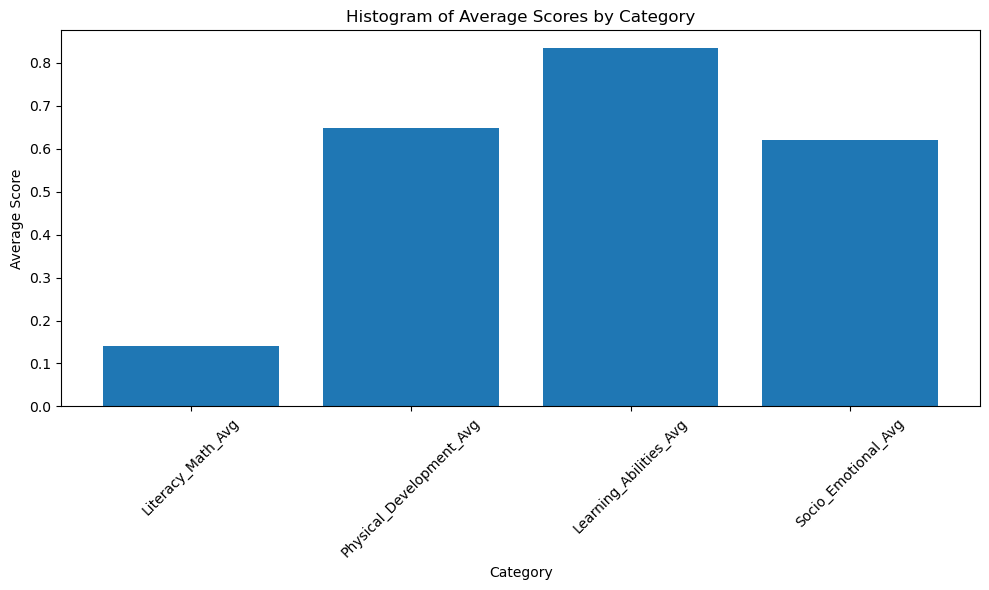

In [11]:
# Calculate the average for each of the specified columns
average_scores = monthly_trends_avg[['Literacy_Math_Avg', 'Physical_Development_Avg', 'Learning_Abilities_Avg', 'Socio_Emotional_Avg']].mean()

# Create a new dataframe with the column names as index and their averages as values
average_scores_df = pd.DataFrame(average_scores, columns=['Average Score']).reset_index().rename(columns={'index': 'Category'})

# Create the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(average_scores_df['Category'], average_scores_df['Average Score'])
plt.xlabel('Category')
plt.ylabel('Average Score')
plt.title('Histogram of Average Scores by Category')
plt.xticks(rotation=45)

# Display plot
plt.tight_layout()
plt.show()


**Interpretation:**

- **Literacy and Math:** The average score in this category is relatively low, suggesting that children aged 4-5 may be struggling more with literacy and math skills compared to other developmental areas.
- **Physical Development:** The average score in this category is moderate, indicating that physical development, including fine motor skills and general health, is relatively strong but still has room for improvement.
- **Learning Abilities:** This category has the highest average score, suggesting that children in this age group are generally performing well in following directions and completing tasks independently.
- **Socio-Emotional Development:** The average score in socio-emotional development is also moderate, reflecting a balance of strengths and challenges in areas such as social interaction and behavior regulation.

This visualization provides a clear, high-level overview of the developmental progress of the children in different domains, guiding further analysis and intervention strategies.


### Monthly Trends in Educational Indicators

To examine how educational and developmental indicators evolved over time, we plotted the monthly trends of the averaged indices for the four key categories: Literacy + Math, Physical Development, Learning Abilities, and Socio-Emotional Development. This time series analysis helps us identify any trends or changes in the children's development across the months surveyed.


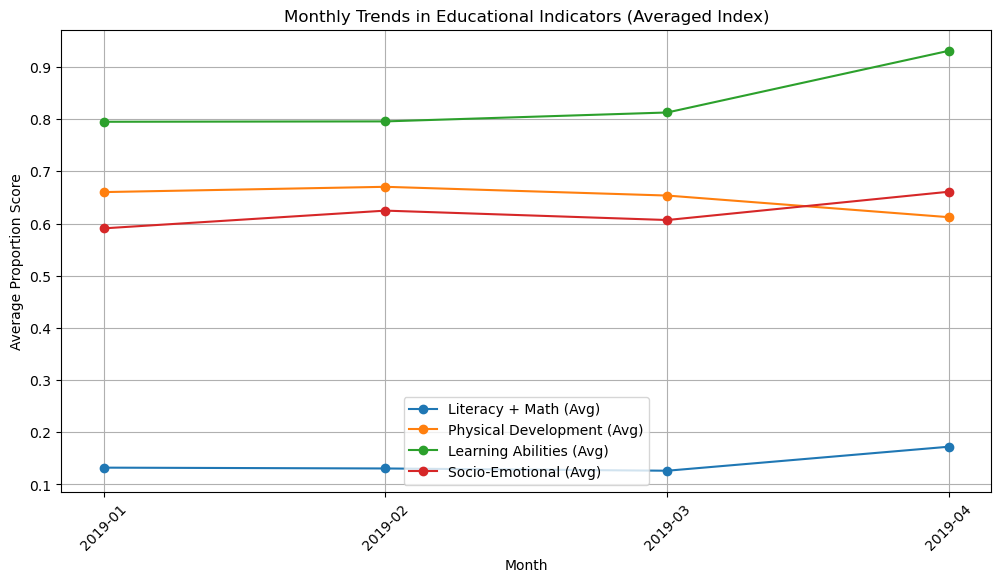

In [12]:

#%% Plotting the Averaged Index results
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends_avg.index.astype(str), monthly_trends_avg['Literacy_Math_Avg'], marker='o', label='Literacy + Math (Avg)')
plt.plot(monthly_trends_avg.index.astype(str), monthly_trends_avg['Physical_Development_Avg'], marker='o', label='Physical Development (Avg)')
plt.plot(monthly_trends_avg.index.astype(str), monthly_trends_avg['Learning_Abilities_Avg'], marker='o', label='Learning Abilities (Avg)')
plt.plot(monthly_trends_avg.index.astype(str), monthly_trends_avg['Socio_Emotional_Avg'], marker='o', label='Socio-Emotional (Avg)')
plt.title('Monthly Trends in Educational Indicators (Averaged Index)')
plt.xlabel('Month')
plt.ylabel('Average Proportion Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**Interpretation:**

- **Learning Abilities:** This category shows a consistent and slightly increasing trend, indicating that children generally performed well in tasks involving following directions and independent activity, with slight improvements over time.

- **Physical Development:** The scores in this category remain relatively stable over the months, suggesting a consistent level of physical capabilities and health among the children.

- **Socio-Emotional Development:** Similar to Physical Development, the Socio-Emotional scores remain stable, though with slight fluctuations, indicating consistent socio-emotional behavior across the months.

- **Literacy and Math:** This category has the lowest scores, which, despite a slight increase in April, remain substantially lower than the other categories, indicating ongoing challenges in literacy and numeracy among the children.


### Age-Specific Analysis: Separating Data for 3-Year-Olds and 4-Year-Olds

To gain a deeper understanding of how educational and developmental outcomes differ by age, we separated the data into two groups: 3-year-olds and 4-year-olds. By analyzing these age groups separately, we can identify any age-specific trends or differences that may not be apparent when analyzing the entire cohort together.

#### Steps:

1. **Data Separation:**
   - The dataset was divided into two subsets based on the age of the children: one for 3-year-olds and one for 4-year-olds.

2. **Calculation of Monthly Trends:**
   - For each age group, we calculated the monthly trends for the four key developmental categories: Literacy + Math, Physical Development, Learning Abilities, and Socio-Emotional Development. This allows us to observe how these indicators evolve over time within each specific age group.


In [13]:

#%% Separate data for 3-year-olds and 4-year-olds
data_3_years = data_cleaned[data_cleaned['child_age_years'] == 3]
data_4_years = data_cleaned[data_cleaned['child_age_years'] == 4]

# Calculate monthly trends for each age group
monthly_trends_3_avg = data_3_years.groupby('interview_month').mean()[[
    'Literacy_Math_Avg', 'Physical_Development_Avg', 'Learning_Abilities_Avg', 'Socio_Emotional_Avg']]
monthly_trends_4_avg = data_4_years.groupby('interview_month').mean()[[
    'Literacy_Math_Avg', 'Physical_Development_Avg', 'Learning_Abilities_Avg', 'Socio_Emotional_Avg']]


### Monthly Trends in Educational Indicators for 3-Year-Olds

To explore how developmental indicators evolve specifically for 3-year-olds, we plotted the monthly trends for each of the averaged indices. This analysis helps to highlight any particular trends or changes in developmental outcomes for this age group over time.


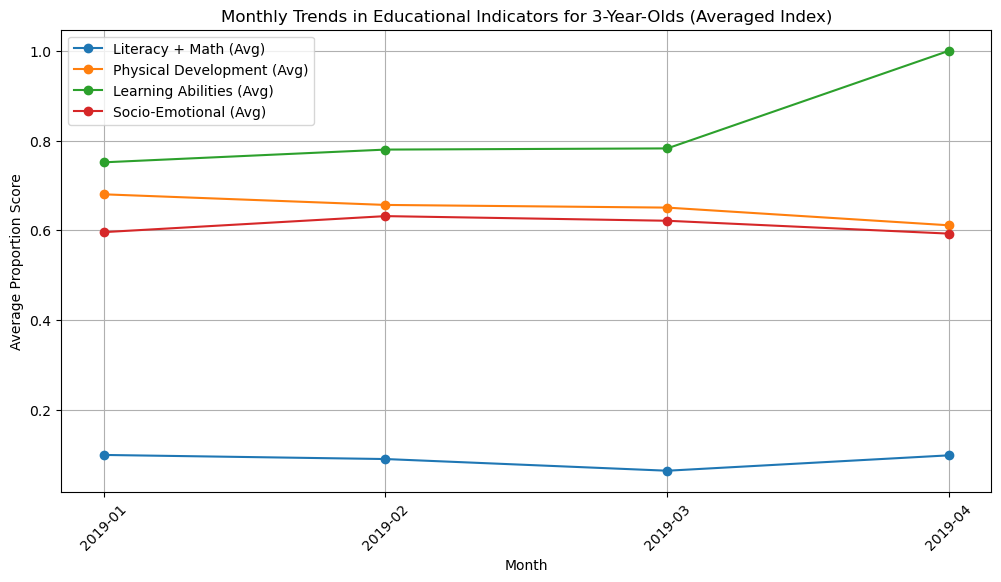

In [14]:

#%% Plot for 3-year-olds (Averaged Index)
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends_3_avg.index.astype(str), monthly_trends_3_avg['Literacy_Math_Avg'], marker='o', label='Literacy + Math (Avg)')
plt.plot(monthly_trends_3_avg.index.astype(str), monthly_trends_3_avg['Physical_Development_Avg'], marker='o', label='Physical Development (Avg)')
plt.plot(monthly_trends_3_avg.index.astype(str), monthly_trends_3_avg['Learning_Abilities_Avg'], marker='o', label='Learning Abilities (Avg)')
plt.plot(monthly_trends_3_avg.index.astype(str), monthly_trends_3_avg['Socio_Emotional_Avg'], marker='o', label='Socio-Emotional (Avg)')
plt.title('Monthly Trends in Educational Indicators for 3-Year-Olds (Averaged Index)')
plt.xlabel('Month')
plt.ylabel('Average Proportion Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**Interpretation:**

- **Learning Abilities:** There is a noticeable upward trend in the Learning Abilities category, indicating that 3-year-olds show improvement in following directions and performing tasks independently as the months progress.

- **Physical Development:** The scores in this category remain relatively stable, suggesting that physical development among 3-year-olds is consistent over time.

- **Socio-Emotional Development:** The Socio-Emotional scores display slight fluctuations but generally remain stable, indicating consistent social and emotional behavior among the 3-year-olds.

- **Literacy and Math:** This category has the lowest scores, with minimal fluctuations across the months, highlighting ongoing challenges in literacy and numeracy for 3-year-olds.



### Monthly Trends in Educational Indicators for 4-Year-Olds

This section explores how developmental indicators change specifically for 4-year-olds over time. By analyzing these trends, we can identify any progress or challenges faced by children in this age group across different developmental domains.


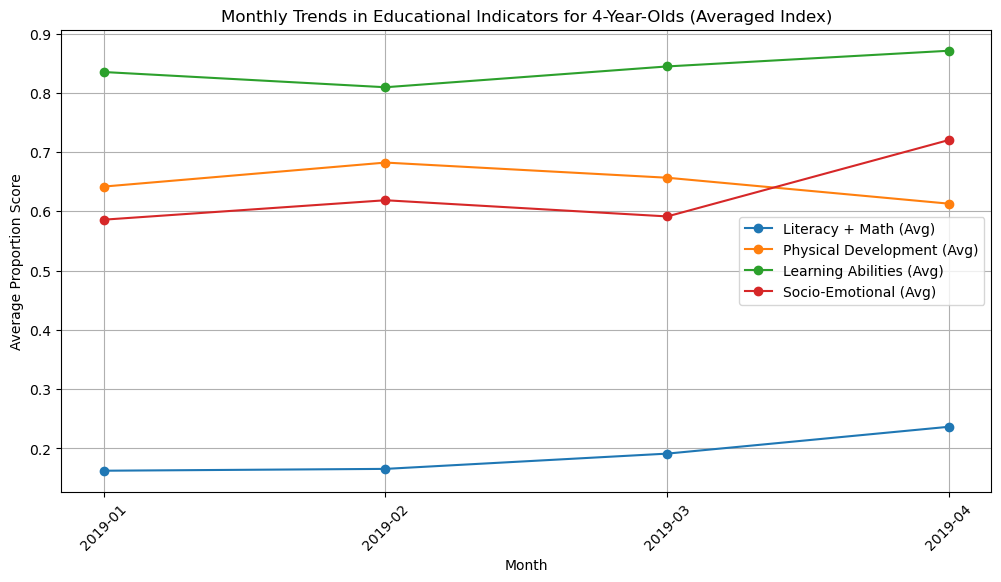

In [20]:

#%% Plot for 4-year-olds (Averaged Index)
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends_4_avg.index.astype(str), monthly_trends_4_avg['Literacy_Math_Avg'], marker='o', label='Literacy + Math (Avg)')
plt.plot(monthly_trends_4_avg.index.astype(str), monthly_trends_4_avg['Physical_Development_Avg'], marker='o', label='Physical Development (Avg)')
plt.plot(monthly_trends_4_avg.index.astype(str), monthly_trends_4_avg['Learning_Abilities_Avg'], marker='o', label='Learning Abilities (Avg)')
plt.plot(monthly_trends_4_avg.index.astype(str), monthly_trends_4_avg['Socio_Emotional_Avg'], marker='o', label='Socio-Emotional (Avg)')
plt.title('Monthly Trends in Educational Indicators for 4-Year-Olds (Averaged Index)')
plt.xlabel('Month')
plt.ylabel('Average Proportion Score')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Plotting Trends for Individual Educational Indicators by Age Group

To gain a more granular understanding of how specific educational indicators (EC6 to EC15) vary by age group, we plotted the trends for each variable. These indicators cover a wide range of developmental areas, from literacy and numeracy to physical abilities and socio-emotional behaviors.


In [16]:

#%% Plotting Trends for Individual Variables (EC6 to EC15) by Age Group
variables = ['EC6', 'EC7', 'EC8', 'EC9', 'EC10', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15']
titles = {
    'EC6': 'Identify Letters',
    'EC7': 'Read Words',
    'EC8': 'Recognize Numbers',
    'EC9': 'Fine Motor Skills',
    'EC10': 'Too Sick to Play',
    'EC11': 'Follows Directions',
    'EC12': 'Independent Tasks',
    'EC13': 'Gets Along with Others',
    'EC14': 'Aggressive Behavior',
    'EC15': 'Easily Distracted'
}


In [17]:

#%% Weighted Analysis Preparation
# Calculate the number of observations per month
monthly_counts = data_cleaned['interview_month'].value_counts().sort_index()

# Calculate the weights as the inverse of the number of observations
weights = 1 / monthly_counts

# Normalize the weights so they sum to 1
normalized_weights = weights / weights.sum()

# Display the weights for each month
print("Weights for each month:")
print(normalized_weights)


Weights for each month:
interview_month
2019-01    0.063857
2019-02    0.061230
2019-03    0.053585
2019-04    0.821328
Freq: M, Name: count, dtype: float64


### Weighted Analysis: Monthly Trends in Educational Indicators

To address the imbalance in the number of observations across different months, we conducted a weighted analysis. This approach ensures that each month is appropriately represented in the analysis, preventing months with fewer observations from disproportionately influencing the results.

#### Steps in Weighted Analysis:

1. **Creating a New DataFrame for Weighted Analysis:**
   - A copy of the cleaned dataset was made, and a new `weight` column was added. This column contains the normalized weights calculated earlier, which correspond to the month in which each interview was conducted.

2. **Calculating Weighted Monthly Trends:**
   - Weighted averages were calculated for the four averaged indices: Literacy + Math, Physical Development, Learning Abilities, and Socio-Emotional Development. This was done by multiplying each observation's score by its corresponding weight, summing these weighted scores, and then dividing by the total weight for each month.
   - The result was then converted back into a DataFrame with the appropriate column names and structure.


In [18]:

#%% Create a new DataFrame for weighted analysis
data_weighted = data_cleaned.copy()

# Map the normalized weights to the new DataFrame
data_weighted['weight'] = data_weighted['interview_month'].map(normalized_weights)

#%% Calculate Weighted Monthly Trends
averaged_index_columns = [
    'Literacy_Math_Avg', 
    'Physical_Development_Avg', 
    'Learning_Abilities_Avg', 
    'Socio_Emotional_Avg'
]

# Calculate weighted averages for the averaged indices
weighted_monthly_trends_avg = data_weighted.groupby('interview_month').apply(
    lambda x: (x[averaged_index_columns].to_numpy() * x['weight'].to_numpy()[:, None]).sum(axis=0) / x['weight'].sum()
)

# Convert the result back to a DataFrame with appropriate column names
weighted_monthly_trends_avg = pd.DataFrame(weighted_monthly_trends_avg.tolist(), 
                                           index=weighted_monthly_trends_avg.index, 
                                           columns=averaged_index_columns)

# Reset the index to ensure the DataFrame structure is correct
weighted_monthly_trends_avg = weighted_monthly_trends_avg.reset_index()


### Weighted Monthly Trends in Educational Indicators

After applying the weighted analysis, we visualized the monthly trends for the four key educational indicators: Literacy + Math, Physical Development, Learning Abilities, and Socio-Emotional Development. This weighted approach accounts for the imbalance in the number of observations collected each month, providing a more accurate representation of the trends over time.


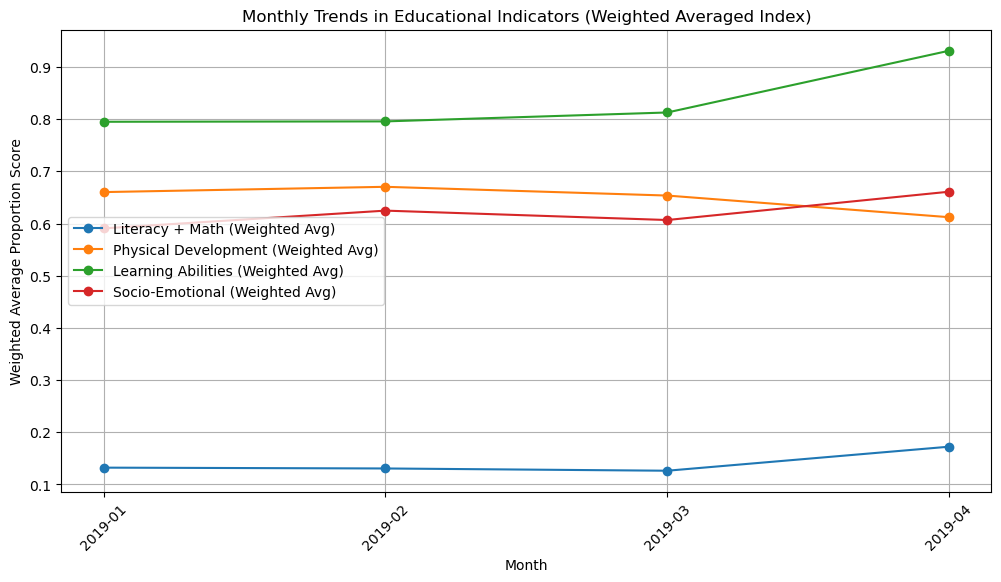

In [26]:

#%% Plotting the Weighted Averaged Index results
plt.figure(figsize=(12, 6))

plt.plot(weighted_monthly_trends_avg['interview_month'].astype(str), 
         weighted_monthly_trends_avg['Literacy_Math_Avg'], 
         marker='o', label='Literacy + Math (Weighted Avg)')

plt.plot(weighted_monthly_trends_avg['interview_month'].astype(str), 
         weighted_monthly_trends_avg['Physical_Development_Avg'], 
         marker='o', label='Physical Development (Weighted Avg)')

plt.plot(weighted_monthly_trends_avg['interview_month'].astype(str), 
         weighted_monthly_trends_avg['Learning_Abilities_Avg'], 
         marker='o', label='Learning Abilities (Weighted Avg)')

plt.plot(weighted_monthly_trends_avg['interview_month'].astype(str), 
         weighted_monthly_trends_avg['Socio_Emotional_Avg'], 
         marker='o', label='Socio-Emotional (Weighted Avg)')

plt.title('Monthly Trends in Educational Indicators (Weighted Averaged Index)')
plt.xlabel('Month')
plt.ylabel('Weighted Average Proportion Score')
plt.legend(loc='center left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



**Explanation:**

- The graph shows how the average proportion scores for each developmental category evolved from January to April 2019 after accounting for the varying sample sizes across these months.
- By applying weights, the analysis ensures that months with fewer observations do not disproportionately influence the overall trends, thereby improving the reliability of the results.

**Interpretation:**

- **Learning Abilities:** The trend remains consistently high, indicating that even after weighting, children generally perform well in tasks involving following directions and independent activities.
- **Physical Development:** The scores in this category remain relatively stable across the months, showing consistent physical development in children.
- **Socio-Emotional Development:** The scores show a slight upward trend, suggesting an improvement in social and emotional behavior over time, particularly as we approach April.
- **Literacy and Math:** Despite some fluctuation, this category shows the lowest average scores, highlighting continued challenges in literacy and numeracy skills among the children.


